In [15]:
# conda install python-graphviz

### Decision trees

Partition the input space $\mathcal X$ into $M$ disjoint regions $R_1\cup\dots\cup R_M$. 

This partition induces the partition of the index set $\{1,\dots,n\}$: $(J_1,\dots,J_M)$, $J_m=\{i:x_i\in R_m\}$. 

* Prediction for regression problems:
$$ \hat f(x)=\overline y_{R_m}:=\frac{1}{|J_m|}\sum_{j\in J_m} y_j,\quad x\in R_m$$
* Prediction for classification problems:
$$ \hat f(x)=\arg\max_{k} p_{mk},\quad p_{mk}=\frac{1}{|J_m|}\sum_{j\in J_m} I(y_j=g_k),\quad x\in R_m$$

We want elements $R_m$ of a partition $(R_1,\dots,R_M)$ to be as **pure** as possible. This means

* for regression problems: small (empirical) variance of $y_i$ for $x_i\in R_m$,

* for classification problems: the labels $y_i$ of $x_i\in R_m$ should concentrate in one class.

**Impurity measures**

* Regression:

$$ \textrm{Variance:}\qquad \mathcal I(R_m)=\frac{1}{|J_m|}\sum_{j\in J_m} (y_j-\overline y_{R_m})^2$$

* Classification:
\begin{align*}
\textrm{Gini index:}\qquad \mathcal I(R_m)=\sum_{j\in R_m} p_{mj}(1-p_{mj})\\
\textrm{Entropy:}\qquad \mathcal I (R_m)=- \sum_{j\in R_m} p_{mj}\ln p_{mj}
\end{align*} 

We want to minimize the impurity of the partition:
$$ \mathcal I(R_1,\dots,R_M)=\sum_{m=1}^M \frac{|J_m|}{n}\mathcal I(R_m)\to\min_{(R_1,\dots,R_M)} $$
$M$ can be fixed or not. Other properties can be required, e.g., the number of elements $(x_i,y_i)$ in each $R_m$ can be bounded from below.

We apply a greedy algorithm to approximatly solve this problem. For given element $R_m$ of the partition consider all possible splits

$$ R_m^-(j,s)=\{x:x^{(j)}\le s\},\quad R_m^+(j,s)=\{x:x^{(j)}> s\}$$

It is enough to consider $s\in\{x^{(j)}_k: k\in J_m\}$. Find a split, minimizing the impurity of the partition: 

$$\sum_{m\ne k} \frac{|J_m|}{n}\mathcal I(R_m)+\frac{|J_k^-(j,s)|}{n}\mathcal I(R_k^-(j,s))+\frac{|J_k^+(j,s)|}{n}\mathcal I(R_k^+(j,s))\to\min_{k,j,s}$$

The same as maximizing of the **information gain**:

\begin{align*}
& \mathcal I(R_1,\dots,R_M)-\mathcal I(R_1,\dots,R_{k-1},R_k^-(j,s),R_k^+(j,s),R_{k+1},\dots,R_M)\\
&  =\frac{|J_k|}{n}\mathcal I(R_k)-\frac{|J_k^-(j,s)|}{n}\mathcal I(R_k^-(j,s))-\frac{|J_k^+(j,s)|}{n}\mathcal I(R_k^+(j,s))\\
& =\frac{|J_k|}{n}\left(\mathcal I(R_k)-\frac{|J_k^-(j,s)|}{|J_k|}\mathcal I(R_k^-(j,s))-\frac{|J_k^+(j,s)|}{|J_k|}\mathcal I(R_k^+(j,s)) \right)\to\max_{k,j,s}
\end{align*}

For a regression problem this gives

$$\frac{|J_k|}{n}\left(\frac{1}{|J_k|}\sum_{j\in J_k} (y_j-\overline y_{R_k})^2-\frac{|J_k^-(j,s)|}{|J_k|}\frac{1}{|J_k^-(j,s)|}\sum_{j\in J_k^-(j,s)} (y_j-\overline y_{J_k^-(j,s)})^2-\frac{|J_k^+(j,s)|}{|J_k|}\frac{1}{|J_k^+(j,s)|}\sum_{j\in J_k^+(j,s)} (y_j-\overline y_{J_k^+(j,s)})^2 \right)\to\max_{k,j,s}$$

The same as

$$ \sum_{j\in J_k} (y_j-\overline y_{R_k})^2-\sum_{j\in J_k^-(j,s)} (y_j-\overline y_{J_k^-(j,s)})^2-\sum_{j\in J_k^+(j,s)} (y_j-\overline y_{J_k^+(j,s)})^2\to\max_{k,j,s}.$$

Recursively applying this greedy algorithm, starting with the trivial partition $R_1=\mathbb R^d$, we get a growing tree with
* nodes corresponding to some subsets $R_m$ of $\mathbb R^d$ 
* edges corresponding to outcomes of optimal partitions
* leafs corresponding to the final partition

#### Parameter tuning

**Pre-pruning**: limits the size of the tree while you building it (early stopping). Hyperparameters in scikit-learn:
* max_depth
* max_leaf_nodes
* min_samples_split
* min_impurity_decrease
* $\dots$

**Post-pruning**: build the whole tree and shrink it. 
* Cost complexity pruning:
$$ \mathcal I_\alpha(T)=\mathcal I(T)+\alpha |T| \to\min_{T}$$
where 
* $\mathcal I(T)$ is the total imputity of the *leafs* of the tree $T$
* $|T|$ is the number of *leafs*
* $\alpha$ is the tuning parameter

Grow the full tree and pull it back to find the subtree that minimizes $\mathcal I_\alpha(T)$.

For categorical features splits can correspond to any subset of possible categories: $2^c$ variants, where $c$ is is the number of categories. However, this is not implemented in scikit-learn: e.g., one-hot encoding is needed. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["savefig.dpi"] = 300
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

 #### Example 
 J.VanderPlas "Python Data Science Handbook"
 
 https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb
 
 No pruning

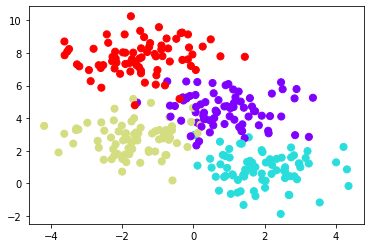

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [19]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-19-2012e9cc4787>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


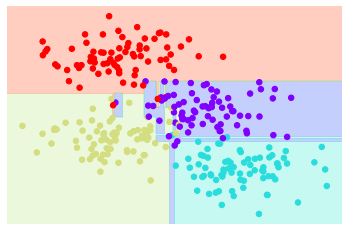

In [20]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [120]:
# Muller

#### Breast cancer dataset

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

max_depth = 2 

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

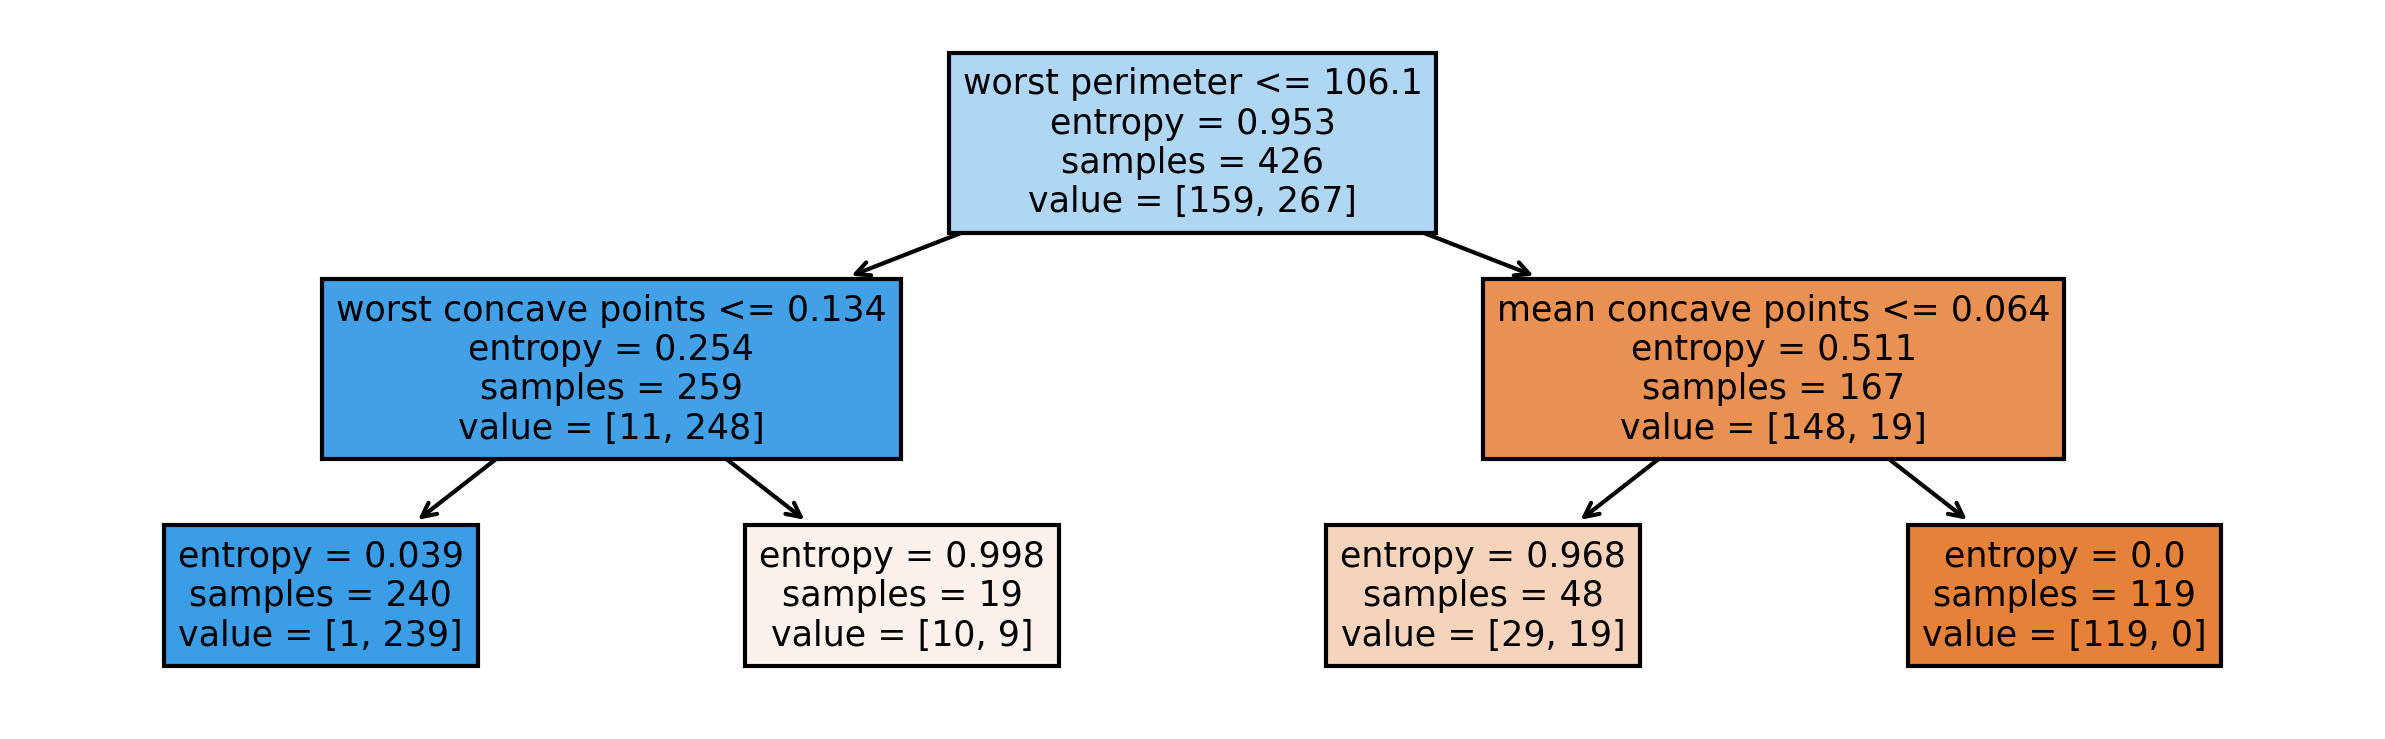

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(tree, feature_names=cancer.feature_names, filled=True)
plt.savefig("images/mpl_tree_plot.png")

#### Paramter tuning

No pruning

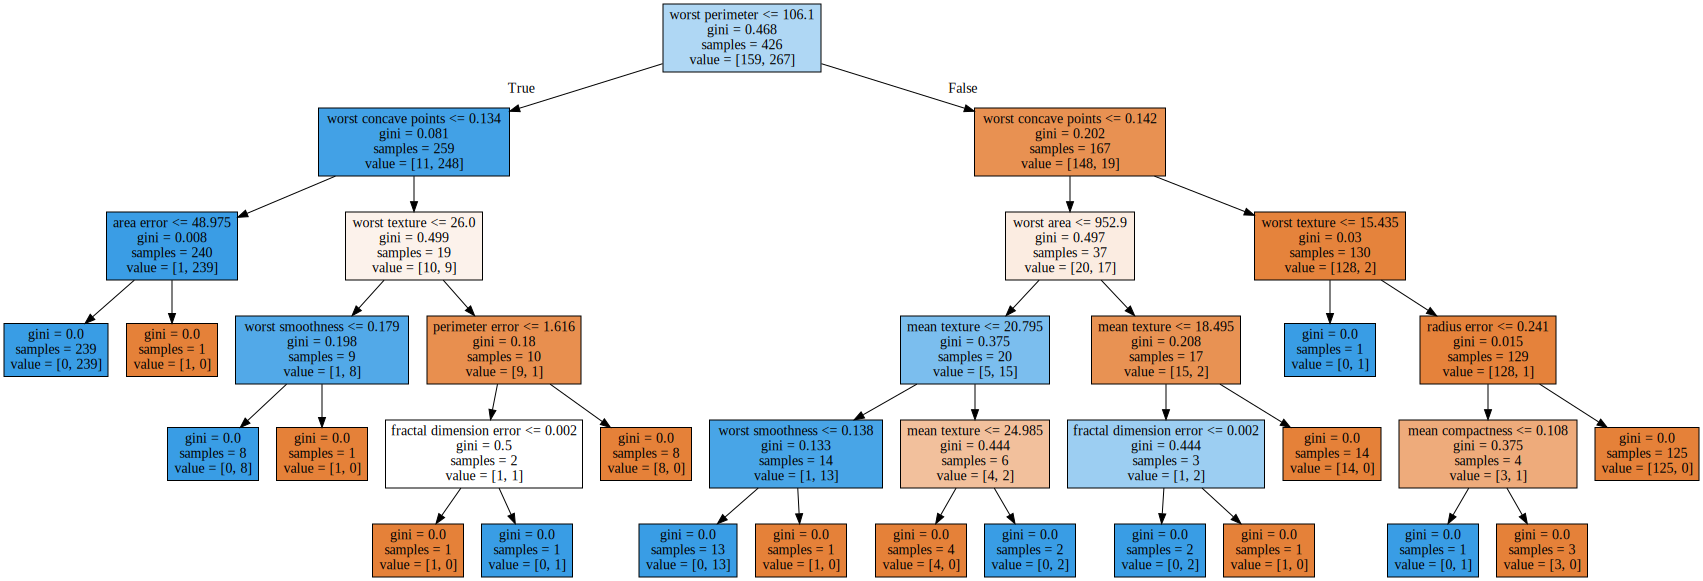

In [24]:
import graphviz
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/no_pruning", cleanup=True)
graph

`max_depth`=1

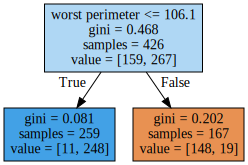

In [25]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_1", cleanup=True)
graph

`max_depth`=4

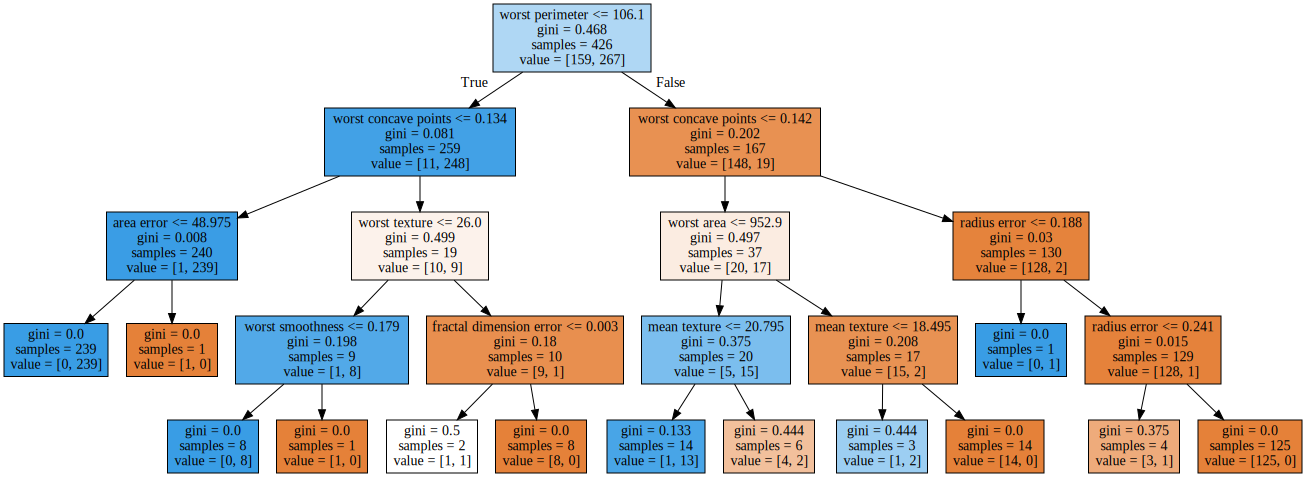

In [26]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_4", cleanup=True)
graph

`max_leaf_nodes`=8

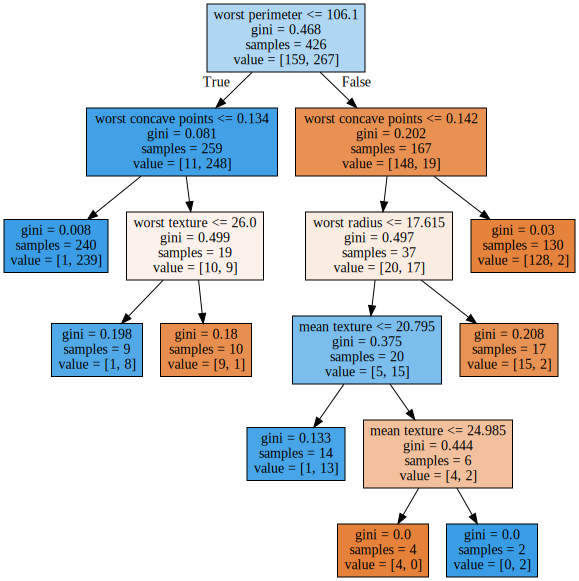

In [27]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_leaf_nodes_8", cleanup=True)
graph

`min_samples_split`=50

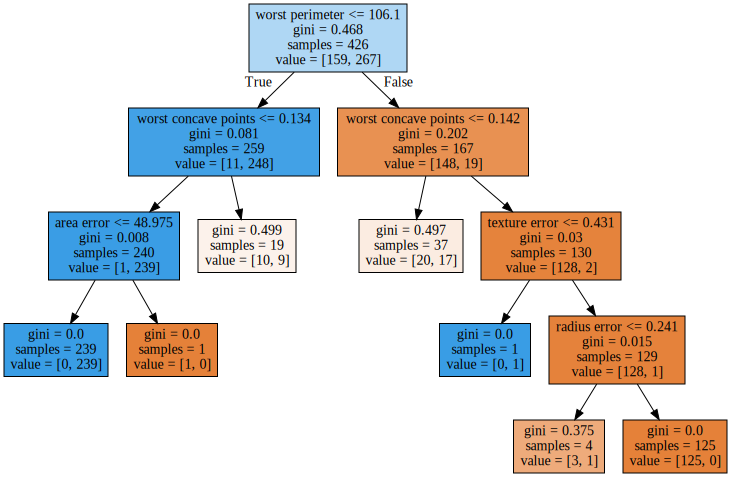

In [28]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/min_samples_split_50", cleanup=True)
graph

`GridSearchCV`: `max_depth` $=1,\dots,7$

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)})

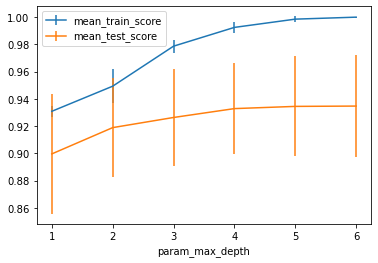

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.savefig("images/grid_max_depth.png")

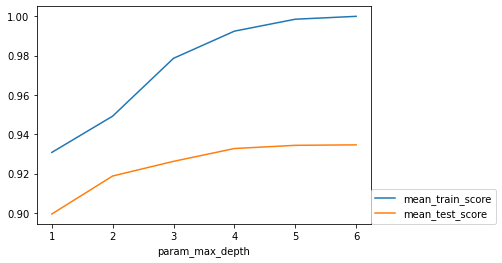

In [31]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

`GridSearchCV`: `max_leaf_nodes` $=2,\dots,20$

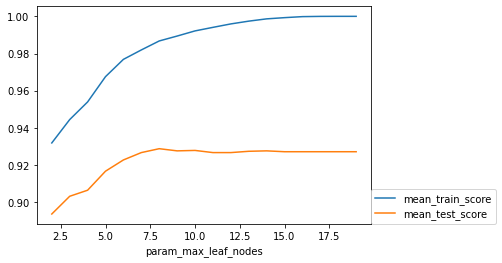

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

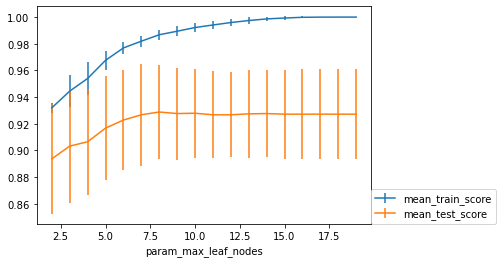

In [33]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.savefig("images/grid_max_leaf_nodes.png")

In [34]:
grid.best_params_

{'max_leaf_nodes': 8}

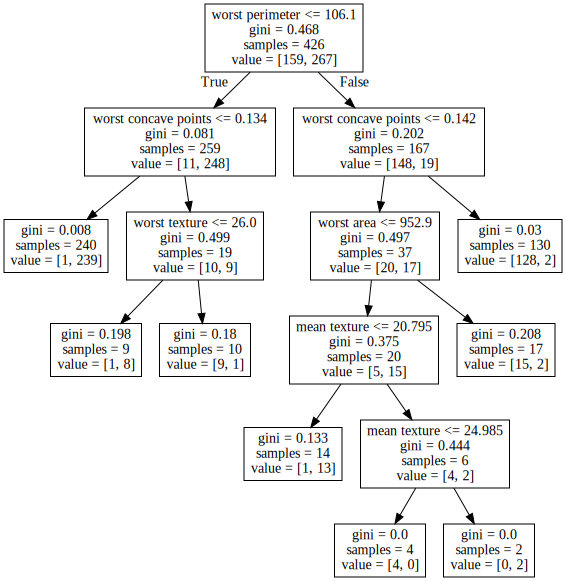

In [35]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph

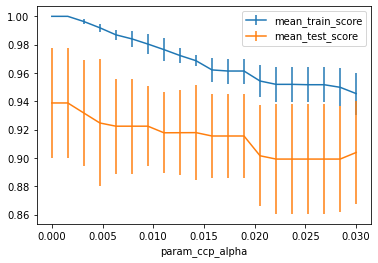

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'ccp_alpha': np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
plt.savefig("images/grid_alpa.png")

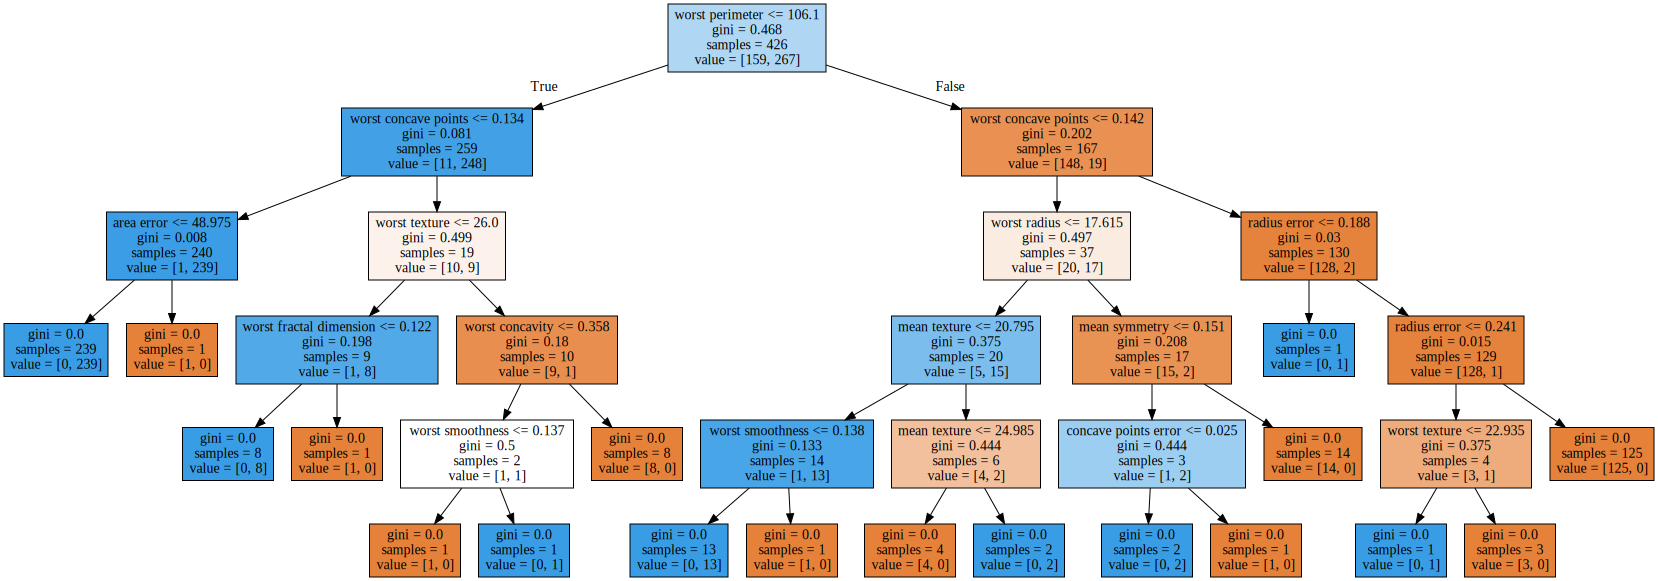

In [37]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/tree_pruned", cleanup=True)
graph

Only certain values of $\alpha$ are meaningful. These values correspond to the appearence of new leafs.

A critical value of $\alpha$ is computed for each internal node (which is not a leaf). The cost complexity measure of a single node $t$ is 

$$\mathcal I_\alpha(t)=\mathcal I(t)+\alpha$$

The branch $T_t$ is defined to be a tree where node $t$ is its root. We define the effective $\alpha$ of a node to be the value where 

$$\mathcal I_\alpha(T_t):=\mathcal I(T_t)+\alpha |T_t|=\mathcal I_\alpha(t):=\mathcal I(t)+\alpha$$

That is,

$$ \alpha=\frac{\mathcal I(t)-\mathcal I(T_t)}{|T_t|-1}$$

`cost_complexity_pruning_path` shows all such $\alpha$. CV can be (and is) performed only over these $\alpha$.

In [49]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=4,random_state=0)
clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

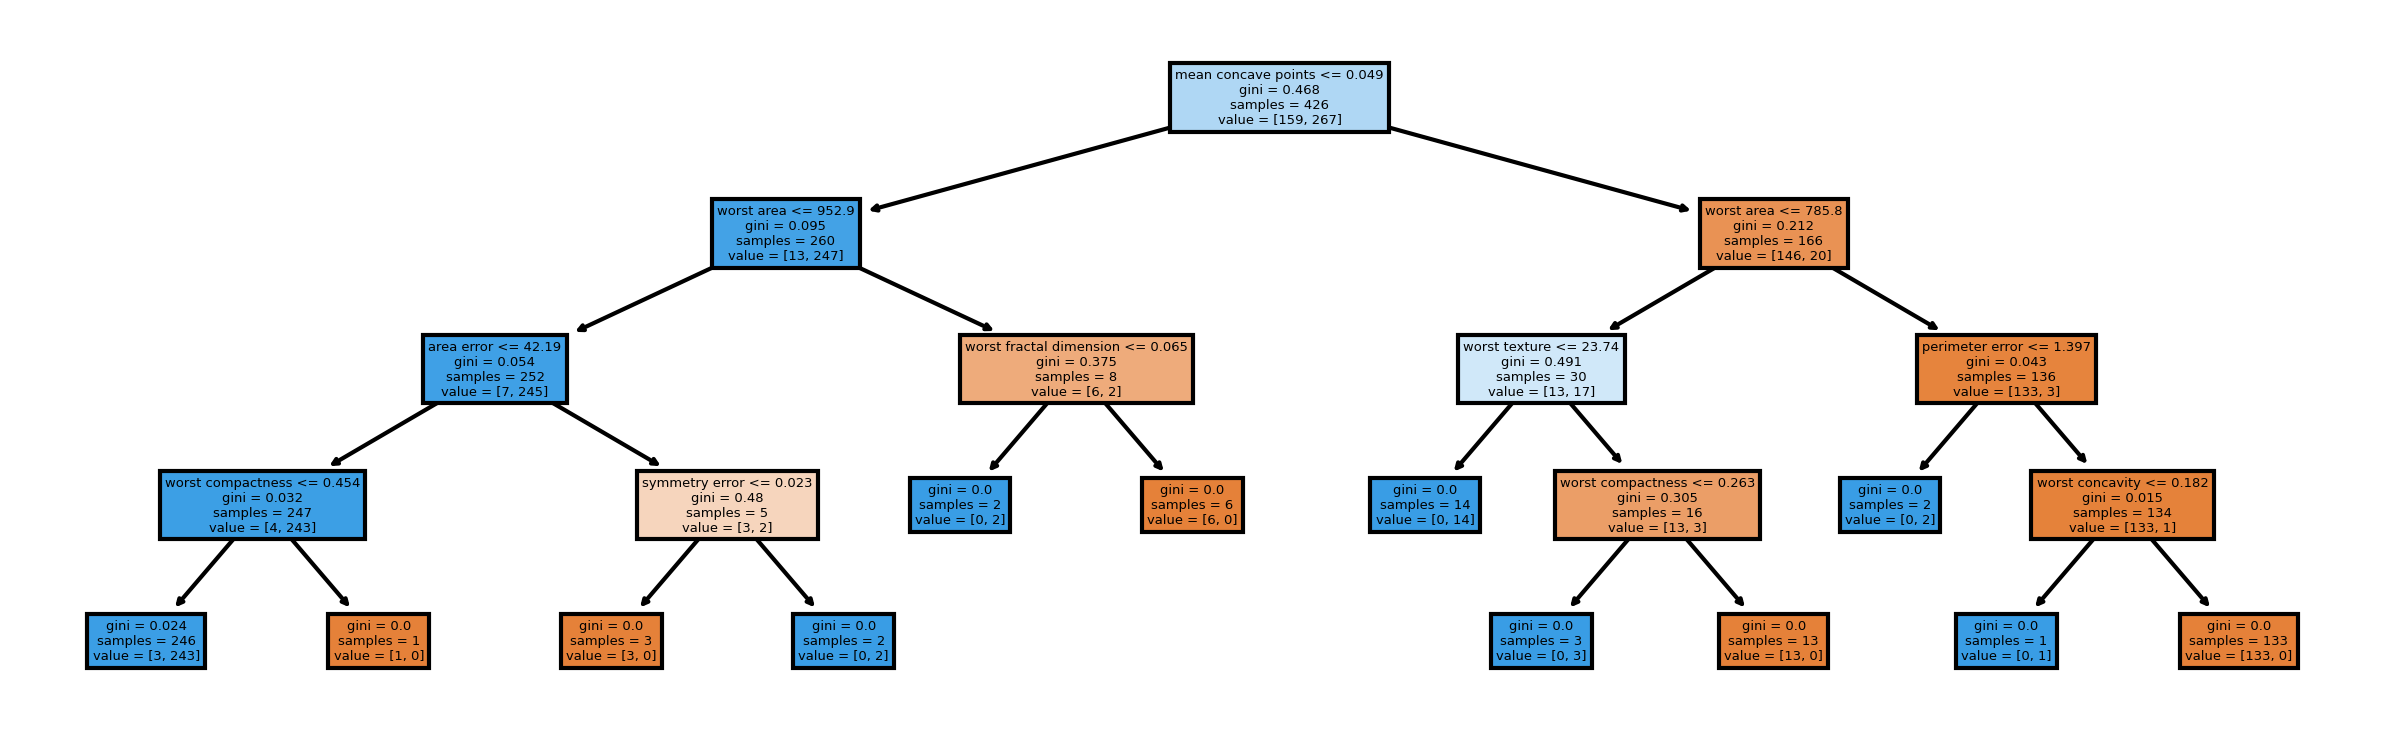

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(clf, feature_names=cancer.feature_names, filled=True)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

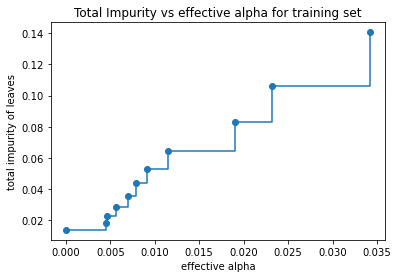

In [51]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

#### Extrapolation

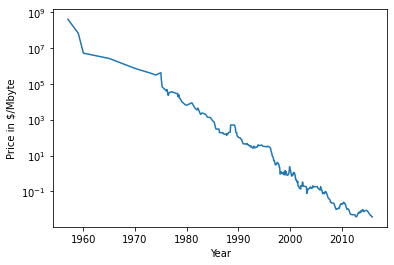

In [54]:
import os
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.savefig("images/ram_prices.png")

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(min_impurity_decrease=.1).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

<ipython-input-55-f5ba2a3220bc>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]


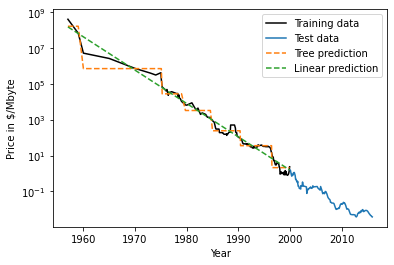

In [56]:
plt.semilogy(data_train.date, data_train.price, label="Training data", c='k')
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(data_train.date, np.exp(tree.predict(X_train)), '--', label="Tree prediction")
plt.semilogy(data_train.date, np.exp(linear_reg.predict(X_train)), '--', label="Linear prediction")
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.legend()
plt.savefig("images/ram_prices_train.png")
ylim = plt.ylim()

<ipython-input-57-fb13bee75cd7>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


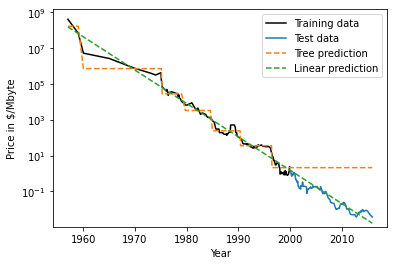

In [57]:
X_all = ram_prices.date[:, np.newaxis]
plt.semilogy(data_train.date, data_train.price, label="Training data", c='k')
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, np.exp(tree.predict(X_all)), '--', label="Tree prediction")
plt.semilogy(ram_prices.date, np.exp(linear_reg.predict(X_all)), '--', label="Linear prediction")
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.legend()
plt.ylim(ylim)
plt.savefig("images/ram_prices_test.png")

Similar to Nearest Neighbors, the Decision trees cannot extrapolate.

Trees 

* do not need a metric
* predict faster

#### Instability

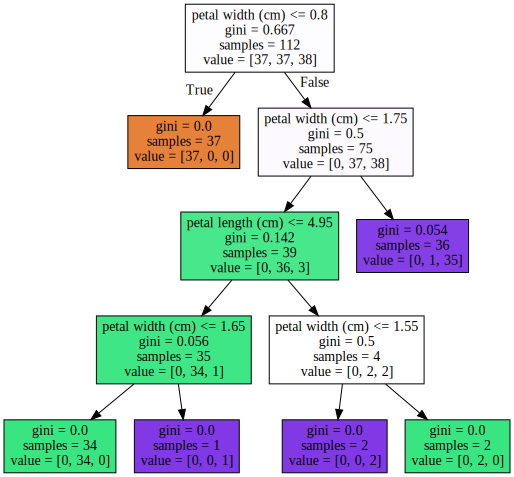

In [59]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/instability_1", cleanup=True)
graphviz.Source(tree_dot)

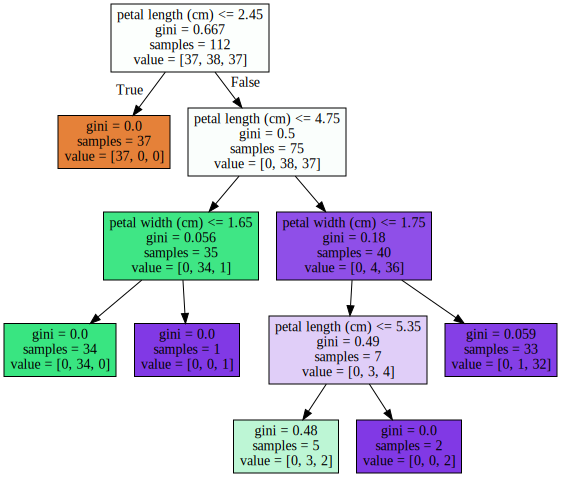

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=13)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=iris.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")

graph.render(filename="images/instability_2", cleanup=True)
graphviz.Source(tree_dot)

#### Feature importance

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. This indicator is also unstable.

In [62]:
tree.feature_importances_

array([0.   , 0.   , 0.946, 0.054])

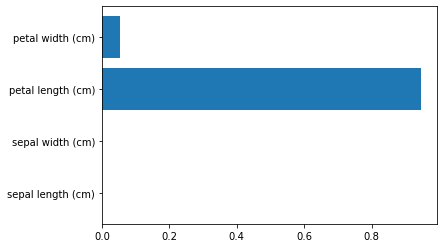

In [64]:
plt.barh(range(4), tree.feature_importances_)
plt.yticks(range(4), iris.feature_names)
plt.savefig("images/tree_importances.png")

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)

In [67]:
tree.feature_importances_

array([0.   , 0.   , 0.022, 0.978])

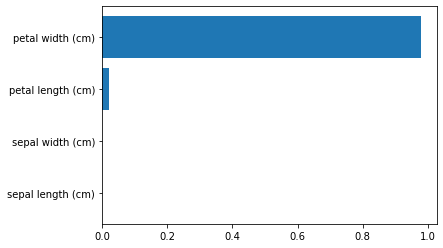

In [68]:
plt.barh(range(4), tree.feature_importances_)
plt.yticks(range(4), iris.feature_names)
plt.savefig("images/tree_importances.png")

### Ensemble models

Construct many models and use the averaging.

#### Voting classifier

Can use
* a majority vote (hard vote) 
* the average predicted probabilities (soft vote) 

to predict the class labels. 

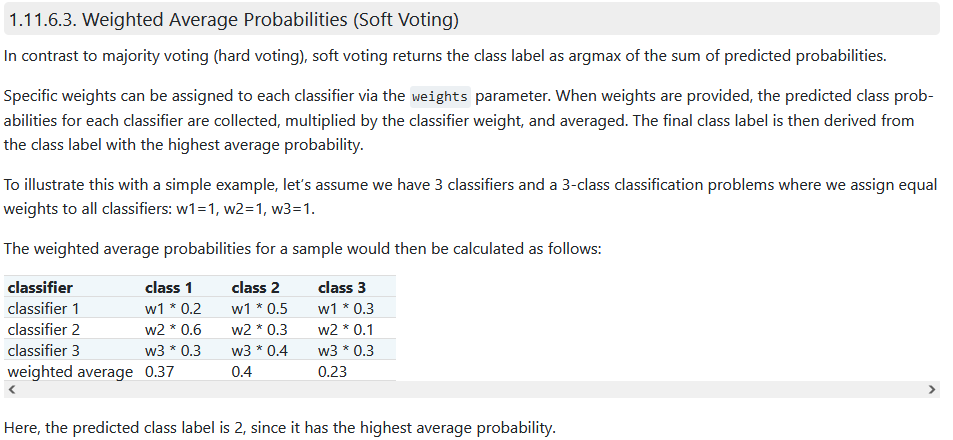

In [92]:
from IPython.display import Image
Image(filename = "soft_vote.png", width = 800, height = 400)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import make_moons
# make_moons produces two interleaving half circles, perturbed bu Gaussian noise
X, y = make_moons(noise=.2, random_state=18) # carefully picked random state for illustration
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
                         voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
print(("LogisticRegression score: {:.2f} ").format(lr.score(X_test, y_test)))    
print(("DecisionTreeClassifier score: {:.2f} ").format(tree.score(X_test, y_test)))
print(("Voting score: {:.2f} ").format(voting.score(X_test, y_test)))

LogisticRegression score: 0.84 
DecisionTreeClassifier score: 0.80 
Voting score: 0.88 


In [87]:
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
# transform produces individual probabilities
y_probs =  voting.transform(X_grid)

In [88]:
y_probs.shape

(10000, 4)

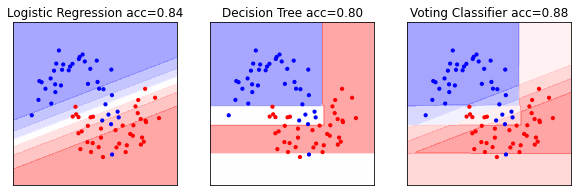

In [89]:
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(10, 3))
scores = [voting.estimators_[0].score(X_test, y_test),
         voting.estimators_[1].score(X_test, y_test),
         voting.score(X_test, y_test)]
titles = ['Logistic Regression', 'Decision Tree', 'Voting Classifier']
for prob, score, title, ax in zip([y_probs[:, 1], y_probs[:, 3], y_probs[:, 1::2].sum(axis=1)], scores, titles, axes.ravel()):
    ax.contourf(x_grid, y_grid, prob.reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
    ax.set_title(title + f" acc={score:.2f}")
plt.savefig("images/voting_classifier.png")

### Bootstrap and Bagging (<font color='red'>B</font>otstrap <font color='red'>agg</font>regation)

Let $S=(x_i,y_i)_{i=1}^n$ be a training data set. A **bootstrapped** training data set $S_{(b)}$ is obtained from $S$ by taking $n$ random samples with replacement: 

$$ S_{(b)}=(x_i^*,y_i^*)_{i=1}^n,\quad (x_i^*,y_i^*)=(x_{\xi_i},y_{\xi_i}),\quad \xi_i: \mathrm{i.i.d.},\quad \mathsf P(\xi_i=k)=1/n,\quad k=1,\dots,n. $$

Let $S_{(1)},\dots,S_{(B)}$ be independently generated $B$ bootstrapped training data sets. Fit a model to each of them: 

$$\hat f_{(b)},\quad b=1,\dots,B$$

and aggregate the fitted models (**bagging**):

* for regression:

$$ \hat f_{\textrm{bag}}(x)=\frac{1}{B}\sum_{b=1}^B \hat f_{(b)}(x)$$

* for classification ($\mathcal Y=\{g_1,\dots,g_K$)):

$$ \hat f_{\textrm{bag}}(x)=g_{k^*},\quad k^*(x)=\arg\max_k\sum_{b=1}^B I(\hat f_{(b)}(x)=g_k),\quad k=1,\dots,K$$

Decision trees without prunning have small bias and large variance. Bagging of the trees (bag of trees) allows to reduce the variance. In general,

$$ \mathrm{Var}\left(\frac{1}{N}\sum_{i=1}^N Y_i\right)=\frac{1}{n^2}\sum_{i=1}^n\mathrm{Var}(Y_i)+ \frac{1}{n^2}\sum_{i\ne j}\mathrm{Cov}(Y_i,Y_j),$$

where 

$$\mathrm{Var}(Y)=\mathsf E(Y-\mathsf EY)^2,\quad \mathrm{Cov}(Y_i,Y_j)=\mathsf E[(Y_i-\mathsf EY_i)(Y_j-\mathsf EY_j) ].$$

If $\mathrm{Var}(Y_i)=\sigma^2$, $\mathrm{Cov}(Y_i,Y_j)=\rho\sigma^2$ (in fact $\rho$ is the correlation coefficient), then

$$ \mathrm{Var}\left(\frac{1}{N}\sum_{i=1}^N Y_i\right)=\frac{\sigma^2}{N}\left(1+(N-1)\rho\right)$$

So we need small correlation of $Y_i$ if we want the variance of the average to be small. 

### Random forest

To make the correlation between the bagged trees smaller, for **each split use a random sample of features**. The size of this sample is a hyperparameter `max_features`. 

Prepruning can be used to reduce the model size.

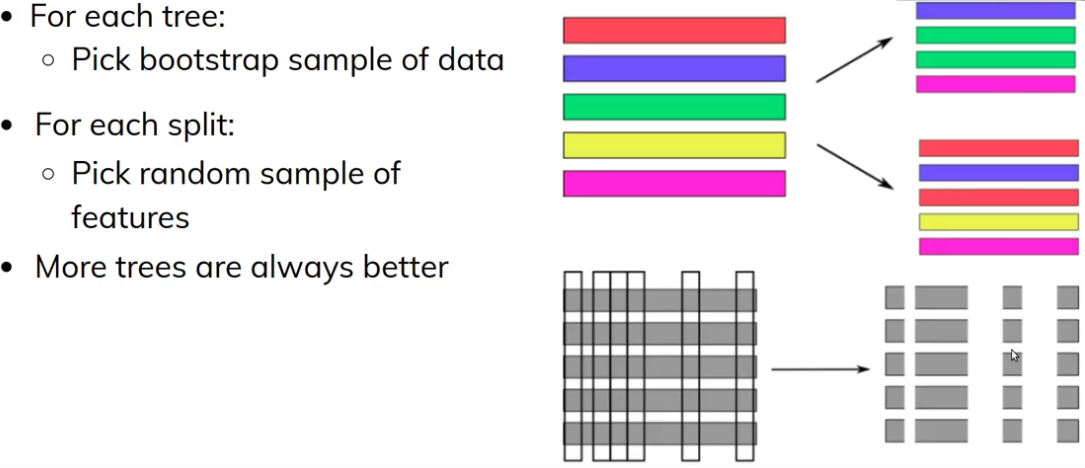

In [96]:
from IPython.display import Image
Image(filename = "randomize_in_two_ways.png", width = 800, height = 400)

#### Example

J.VanderPlas "Python Data Science Handbook"

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

Bagging

In [131]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

<ipython-input-19-2012e9cc4787>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


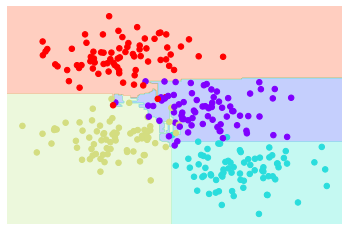

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Random forest

<ipython-input-19-2012e9cc4787>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


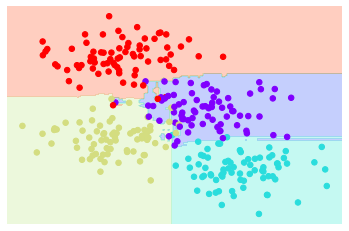

In [133]:
from sklearn.ensemble import RandomForestClassifier
# By default, max_features=sqrt(n_features)
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

#### Random Forest for Classifying Digits

In [109]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

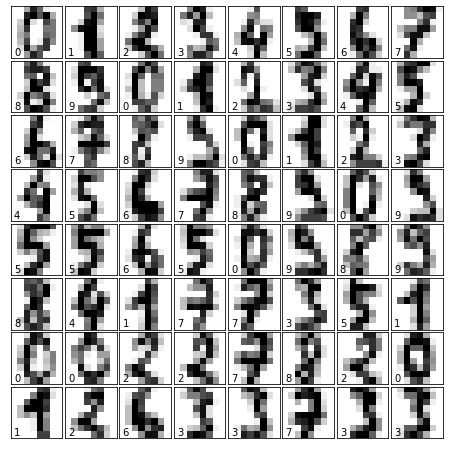

In [110]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [112]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

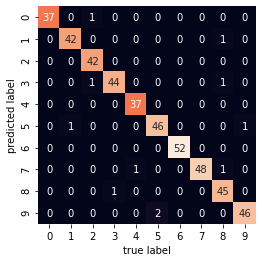

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [116]:
# Muller

#### Warm start

Allows to change a hyperparameter and traing again, but the training will be restarted where you stopped. 

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In the following example only newly added 5 trees will be fitted at each step.

In [118]:
train_scores = []
test_scores = []
rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

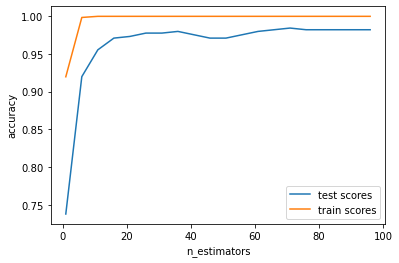

In [119]:
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.savefig("images/warm_start_forest.png")

#### Extremly randomized trees

* Randomly draw threshold for each feature
* Do not use bootstrap by default

They 

* are faster because no sorting / searching
* can have smoother boundaries

In [129]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

<ipython-input-19-2012e9cc4787>:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


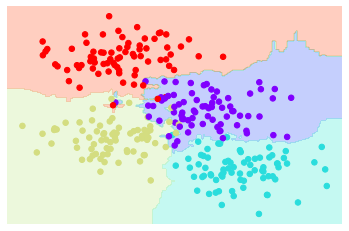

In [130]:
from sklearn.ensemble import ExtraTreesClassifier
# By default, max_features=sqrt(n_features)
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### Out-of-Bag error estimation

This is a method of the test error estimation of a bagged model without cross-validation.

The probability that a point $(x_i,y_i)$ will not be selected: 

$$ \mathsf P(A_i^c)=\prod_{j=1}^n\mathsf P(\xi_j\neq i)=(1-1/n)^n\to \frac{1}{e},\quad n\to\infty. $$

Expected number of points which will no appear in $S_{(b)}$:

$$ \mathsf E\sum_{i=1}^n I_{A_i^c}=\sum_{i=1}^n \mathsf P(A_i^c)\approx \frac{n}{e}.$$

Expected number of different points in $S_{(b)}$:

$$ \approx n-\frac{n}{e}\approx 0.63 n.$$

Each bootsrapped model $\hat f_{(b)}$ does not see $\approx 37$\% of the data. The test error of the $\hat f_{\textrm{bag}}$ can be estimated as follows.

* For regression:

$$ \frac{1}{n}\sum_{i=1}^n \left(y_i-\frac{1}{|\{b:(x_i,y_i)\not\in S_{(b)}\}|}\sum_{b:(x_i,y_i)\not\in S_{(b)}} \hat f_{(b)}(x_i) \right)^2$$

* For calssification:

$$ \frac{1}{n}\sum_{i=1}^n I(y_i\neq y_{\nu(x_i)}),\quad \nu(x_i)=\arg\max\limits_{1\le k\le K}\sum_{b:(x_i,y_i)\not\in S_{(b)}} I\left(\hat f_{(b)}(x_i)=y_k\right)$$

Thus, for estimating the output $y_i$ at $x_i$ we use only the models $\hat f_{(b)}$ which did not see $(x_i,y_i)$.

#### Comparison of out-of-bag estimates and estimates over a fresh sample for `load_digits` data set.

In [139]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    # out-of-bag scores
    oob_scores.append(rf.oob_score_)

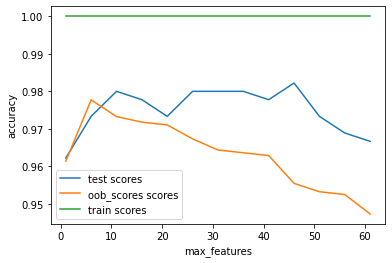

In [140]:
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("max_features")
plt.savefig("images/oob_estimates.png")

#### Feature importance
indicator is much more stable for Random forest: the average feture importance over the trees.

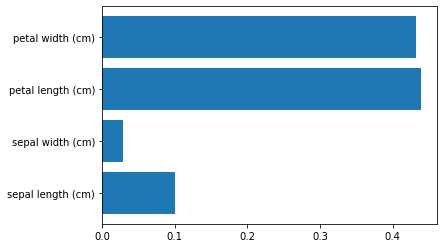

In [143]:
plt.barh(range(4), rf.feature_importances_)
plt.yticks(range(4), iris.feature_names)
plt.savefig("images/forest_importances.png")

#### Remark. For tree-based methods the scaling is not required 

(robustness with respect to the distribution of the data)